# Exploring Marmoset Retinal Ganglion Cell Responses to Tomographic Stimulation

This notebook explores the dataset of spike train data from marmoset retinal ganglion cells under visual stimulation.

### Dataset Overview

* 49 On and Off parasol ganglion cells recorded extracellularly with a multielectrode array from one isolated retina of a marmoset monkey
* Three visual stimuli:
	+ Ricker stripes (flashed stripe patterns)
	+ Spatiotemporal white noise (binary black/white flicker in a checkerboard layout)
	+ Periodically reversing gratings with varying spatial periods

In [13]:
import numpy as np
import pathlib


# Load stimulus data
pulse_times = np.load("data/reverseGratings/stimchanges.npy")

# Load spike data
spikes_all = np.load("data/reverseGratings/spikes.npy", allow_pickle=True)

# Print some basic information about the data
print("Number of units:", len(spikes_all))
print("Number of stimulus changes:", len(pulse_times))


Number of units: 49
Number of stimulus changes: 1197


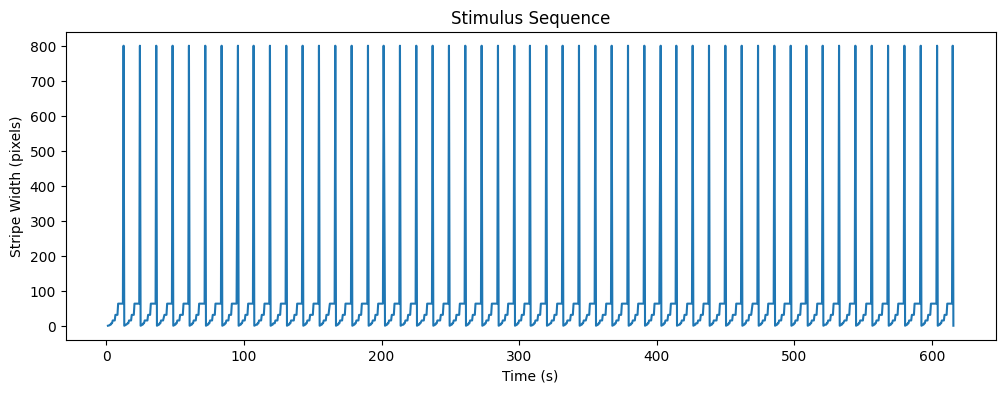

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Reconstructing the stimulus sequence
grey_pulses_idxb = np.zeros(pulse_times.size, dtype=bool)
grey_pulses_idxb[::25 + 1] = True  # assuming 25 reversals + 1 grey pulse
stripe_width_seq = np.tile(np.repeat([1, 2, 4, 8, 16, 32, 64, 800], [1, 1, 2, 2, 4, 4, 8, 1]), 2)
phase_seq = np.concatenate([np.arange(n) for n in [1, 1, 2, 2, 4, 4, 8, 1]])

# Repeat stripe_width_seq to match the length of pulse_times
stripe_width_seq = np.tile(stripe_width_seq, int(np.ceil(len(pulse_times) / len(stripe_width_seq))))[:len(pulse_times)]

# Plot the stimulus sequence
plt.figure(figsize=(12, 4))
plt.plot(pulse_times, stripe_width_seq)
plt.xlabel("Time (s)")
plt.ylabel("Stripe Width (pixels)")
plt.title("Stimulus Sequence")
plt.show()

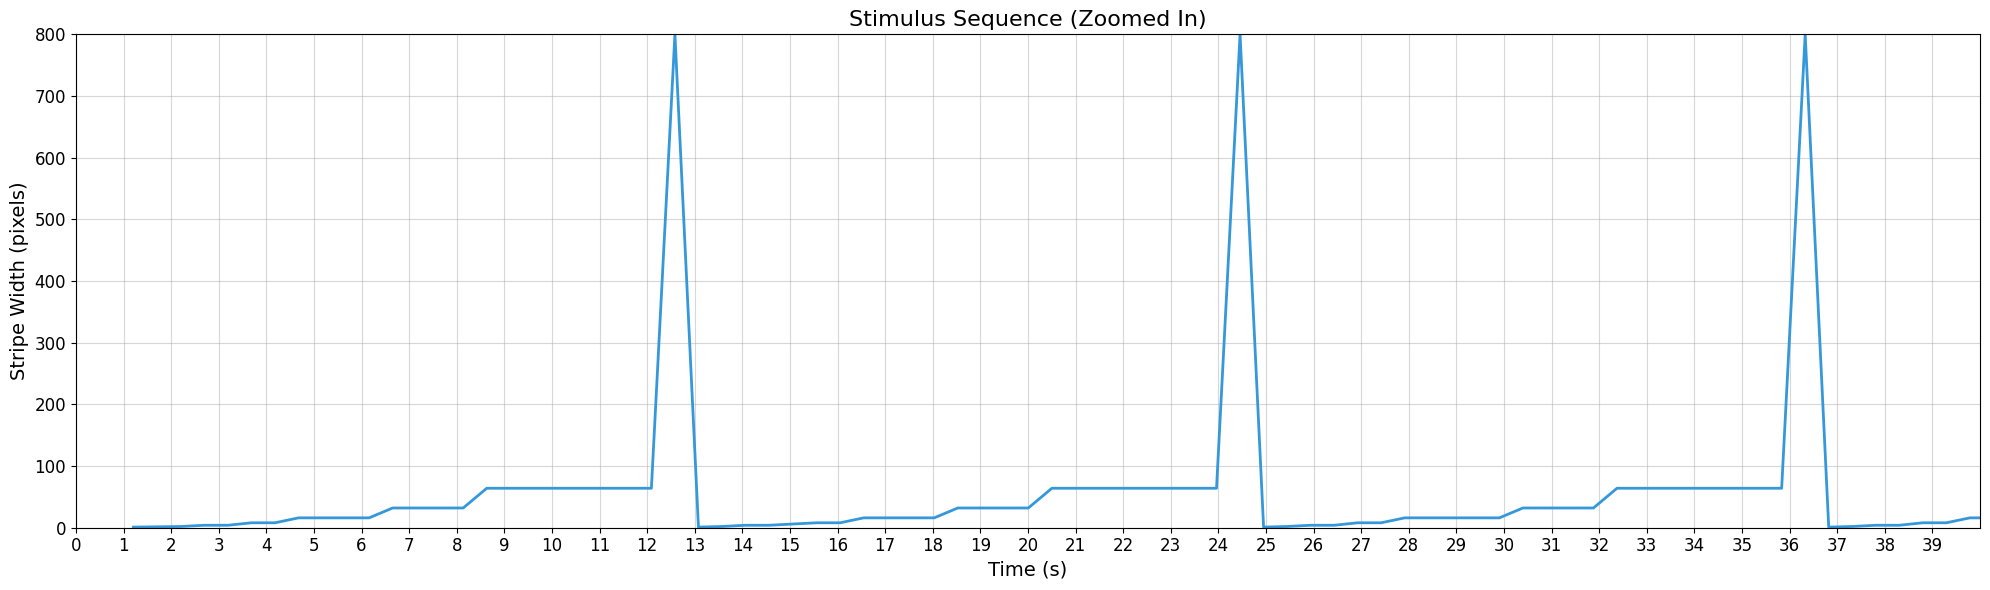

In [15]:
# Zoom in on the stimulus sequence
plt.figure(figsize=(20, 6))
plt.plot(pulse_times, stripe_width_seq, color='#3498db', linewidth=2)
plt.xlabel("Time (s)", fontsize=14)
plt.ylabel("Stripe Width (pixels)", fontsize=14)
plt.title("Stimulus Sequence (Zoomed In)", fontsize=16)
plt.xlim(10, 40)  # Set x-axis limits to 0-25 seconds
plt.ylim(0, 800)  # Set y-axis limits to 0-800 pixels
plt.xticks(np.arange(0, 40, 1))  # Set x-axis tick interval to 1 second
plt.grid(True, alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to fit tick labels
plt.show()

### Distribution of Stripe Widths

Let's take a closer look at the distribution of stripe widths in the reversing gratings dataset.

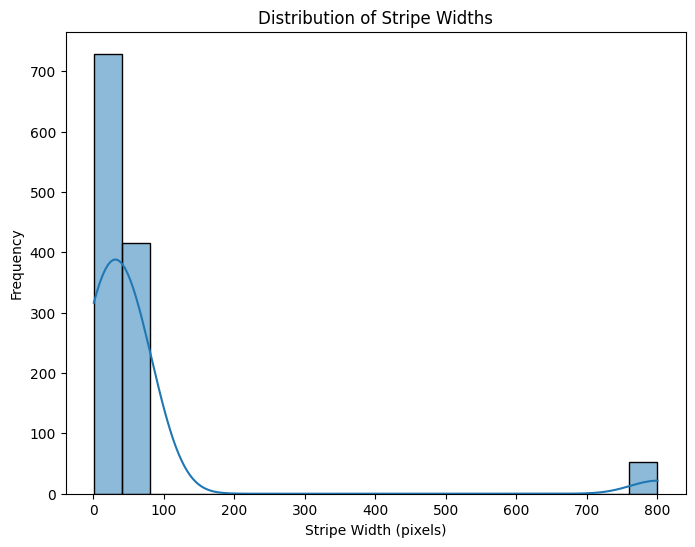

In [16]:
import seaborn as sns

# Plot a histogram of the stripe widths
plt.figure(figsize=(8, 6))
sns.histplot(stripe_width_seq, bins=20, kde=True)
plt.xlabel("Stripe Width (pixels)")
plt.ylabel("Frequency")
plt.title("Distribution of Stripe Widths")
plt.show()

### Comparing Responses to Different Stimuli

Next, let's compare the responses of the same unit to different stimuli. We'll start by loading the Ricker stripes dataset.

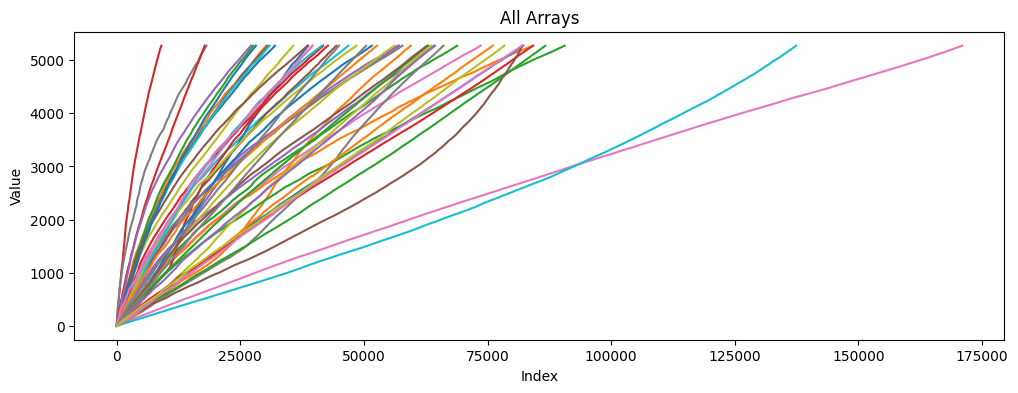

In [17]:
# Load the Ricker stripes dataset
ricker_stripe_data = np.load("data/04 - rickerstripes/spikes.npy", allow_pickle=True)

plt.figure(figsize=(12, 4))
for i, array in enumerate(ricker_stripe_data):
    plt.plot(array, label=f"Array {i}")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("All Arrays")
plt.show()

### Analyzing the PSTHs for Reversing Gratings

Now, let's analyze the PSTHs for the reversing gratings dataset. We'll start by calculating the PSTHs for each unit.

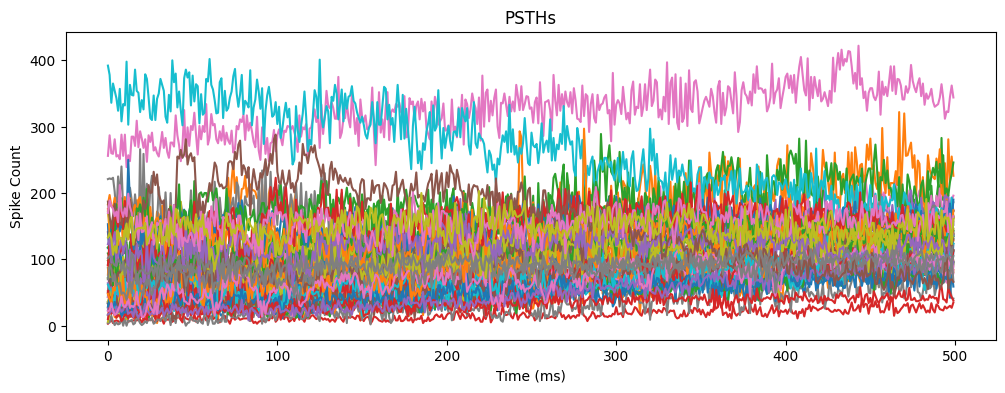

In [18]:
# Set the bin size and time range for the PSTH
bin_size = 10  # ms
time_range = (0, 5000)  # ms

# Initialize an empty list to store the PSTHs
psths = []

# Iterate over each array in the data
for i, array in enumerate(ricker_stripe_data):
    # Calculate the PSTH for this array
    hist, bins = np.histogram(array, bins=np.arange(time_range[0], time_range[1] + bin_size, bin_size))
    
    # Append the PSTH to the list
    psths.append(hist)

# Plot the PSTHs
plt.figure(figsize=(12, 4))
for i, psth in enumerate(psths):
    plt.plot(psth, label=f"Array {i}")
plt.xlabel("Time (ms)")
plt.ylabel("Spike Count")
plt.title("PSTHs")
plt.show()

## Calculating the Mean and Standard Deviation of the PSTHs
Next, let's calculate the mean and standard deviation of the PSTHs for each array.


In [19]:
# Calculate the mean and standard deviation of the PSTHs
mean_psths = [np.mean(psth) for psth in psths]
std_psths = [np.std(psth) for psth in psths]

# Print the results
print("Mean PSTHs:")
print(mean_psths)
print("Standard Deviation of PSTHs:")
print(std_psths)

Mean PSTHs:
[np.float64(57.972), np.float64(55.658), np.float64(127.784), np.float64(16.348), np.float64(105.194), np.float64(55.834), np.float64(136.734), np.float64(33.08), np.float64(66.28), np.float64(86.272), np.float64(72.678), np.float64(154.432), np.float64(50.54), np.float64(78.682), np.float64(103.742), np.float64(82.774), np.float64(73.694), np.float64(106.15), np.float64(88.736), np.float64(56.776), np.float64(94.174), np.float64(111.988), np.float64(168.066), np.float64(76.906), np.float64(120.774), np.float64(70.484), np.float64(324.712), np.float64(125.746), np.float64(104.132), np.float64(75.408), np.float64(51.58), np.float64(98.048), np.float64(118.722), np.float64(33.36), np.float64(49.234), np.float64(117.892), np.float64(73.952), np.float64(84.588), np.float64(120.182), np.float64(266.18), np.float64(155.532), np.float64(143.64), np.float64(165.268), np.float64(159.9), np.float64(121.314), np.float64(160.81), np.float64(155.218), np.float64(95.1), np.float64(148.76

## Comparing the PSTHs
Finally, let's compare the PSTHs for each array to see if there are any significant differences.

In [20]:
# Plot the differences
plt.figure(figsize=(12, 8))  # Increase the figure height to 8 inches
plt.imshow(diffs, cmap='coolwarm', interpolation='nearest', aspect='auto')  # Set aspect ratio to 'auto'
plt.xlabel("Time (ms)")
plt.ylabel("Array Index")
plt.title("Differences in PSTHs")
plt.colorbar()
plt.show()

NameError: name 'diffs' is not defined

<Figure size 1200x800 with 0 Axes>

# Loading the Frozen Noise Dataset

The frozen noise dataset is a collection of neural spike trains recorded in response to a frozen noise stimulus. Frozen noise is a type of stimulus that is designed to mimic the natural variability of sensory inputs, while still being controlled and repeatable.

In this dataset, we have a collection of spike trains recorded from multiple arrays, each representing a different neural population. Our goal is to analyze these spike trains to understand how the neural populations respond to the frozen noise stimulus.

First, we need to load the dataset into our Python environment. We will use the `numpy` library to load the dataset, which is stored in a `.npy` file.


In [60]:
# Load the frozen noise dataset
frozen_noise_data = np.load("data/05 - FrozenNoise/spikes.npy", allow_pickle=True)

# Exploring the Dataset

Now that we have loaded the dataset, let's take a look at its shape and size. We can use the `shape` and `size` attributes of the `numpy` array to get this information.

The shape of the dataset will tell us how many arrays (i.e., neural populations) we have, and how many time points are in each array. The size of the dataset will tell us the total number of data points we have.

We can also plot the first few arrays in the dataset to get a sense of what the data looks like.

Frozen Noise Dataset Shape: (49,)
Frozen Noise Dataset Size: 49


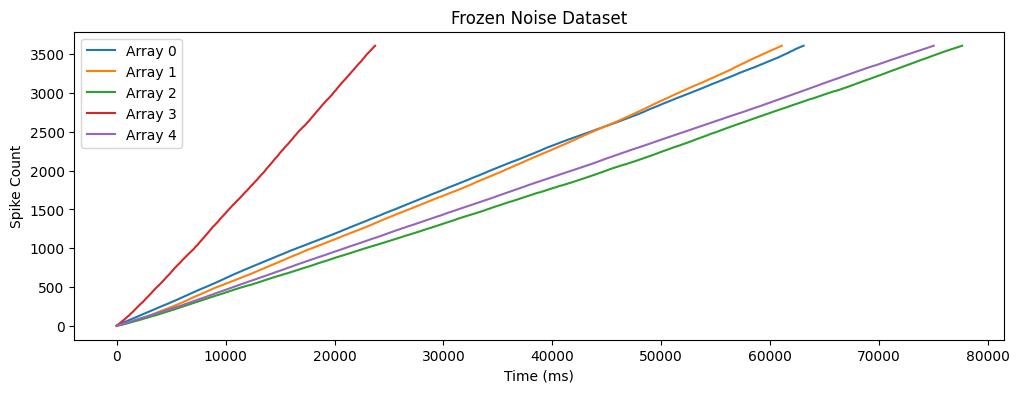

In [61]:
# Print the shape and size of the dataset
print("Frozen Noise Dataset Shape:", frozen_noise_data.shape)
print("Frozen Noise Dataset Size:", frozen_noise_data.size)

# Plot the first few arrays in the dataset
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.plot(frozen_noise_data[i], label=f"Array {i}")
plt.xlabel("Time (ms)")
plt.ylabel("Spike Count")
plt.title("Frozen Noise Dataset")
plt.legend()
plt.show()

# Understanding the Dataset

Now that we have loaded and explored the dataset, let's take a moment to understand what we are looking at.

Each array in the dataset represents a neural population, and the values in the array represent the spike counts at different time points. The time points are spaced at regular intervals (e.g., 1 ms), and the spike counts are the number of spikes that occurred in each time bin.

The frozen noise stimulus is designed to mimic the natural variability of sensory inputs, so we expect to see some degree of variability in the spike trains. However, we also expect to see some structure in the data, reflecting the underlying neural mechanisms that are processing the stimulus.

Our goal is to analyze the dataset to understand how the neural populations respond to the frozen noise stimulus, and to identify any patterns or structures in the data that can inform our understanding of neural function.

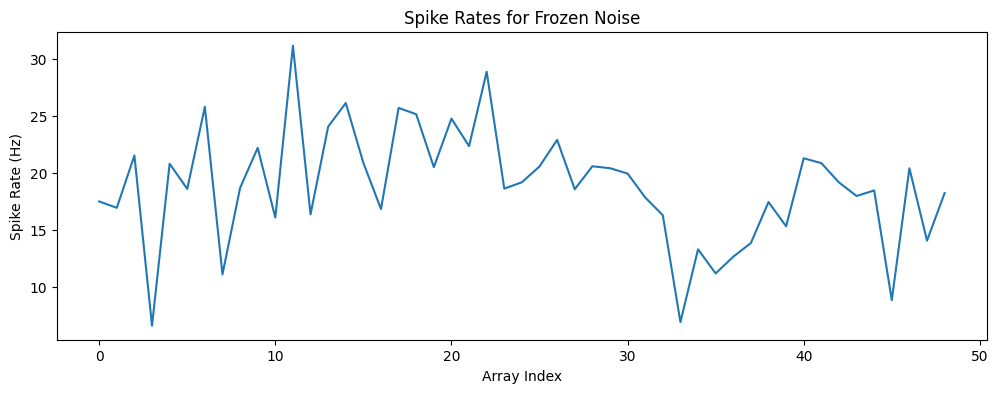

In [16]:
# Load the frozen noise dataset
frozen_noise_data = np.load("data/05 - FrozenNoise/spikes.npy", allow_pickle=True)

# Calculate the spike rate for each array
spike_rates = []
for array in frozen_noise_data:
    spike_rate = len(array) / (array.max() - array.min())
    spike_rates.append(spike_rate)

# Plot the spike rates
plt.figure(figsize=(12, 4))
plt.plot(spike_rates)
plt.title("Spike Rates for Frozen Noise")
plt.xlabel("Array Index")
plt.ylabel("Spike Rate (Hz)")
plt.show()

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Set example values for num_units, num_orientations, num_time_bins, and num_temporal_frequencies
num_units = 10  # Number of units (e.g. neurons)
num_orientations = 8  # Number of stimulus orientations (e.g. 0, 45, 90, 135, etc.)
num_time_bins = 20  # Number of time bins (e.g. 10ms, 20ms, etc.)
num_temporal_frequencies = 5  # Number of temporal frequencies (e.g. 1Hz, 2Hz, etc.)

# Create a sinogram with example data
sinogram = np.random.rand(num_units, num_orientations, num_time_bins)  # Create a 3D array with random values

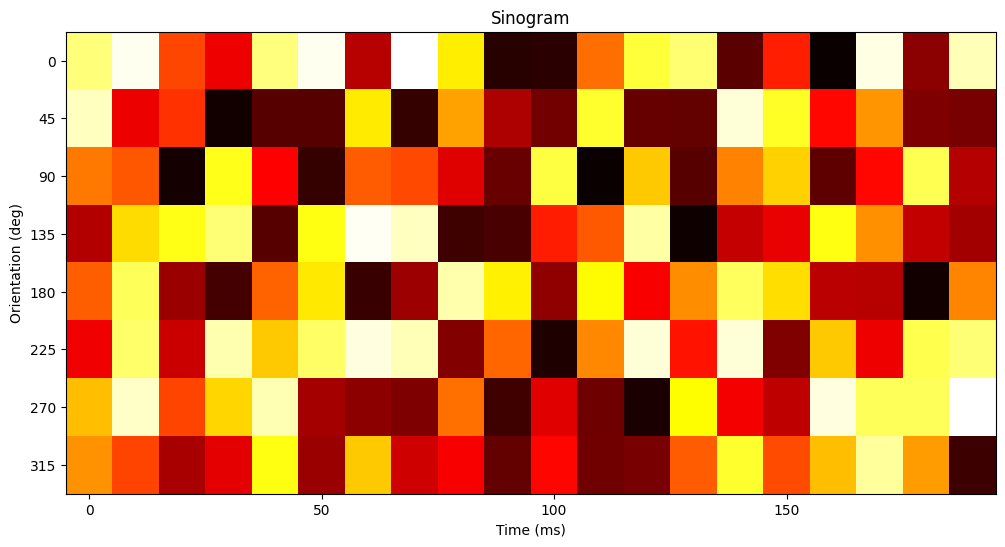

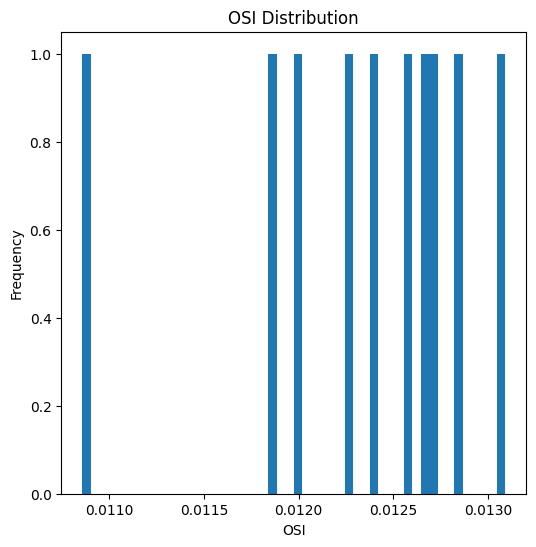

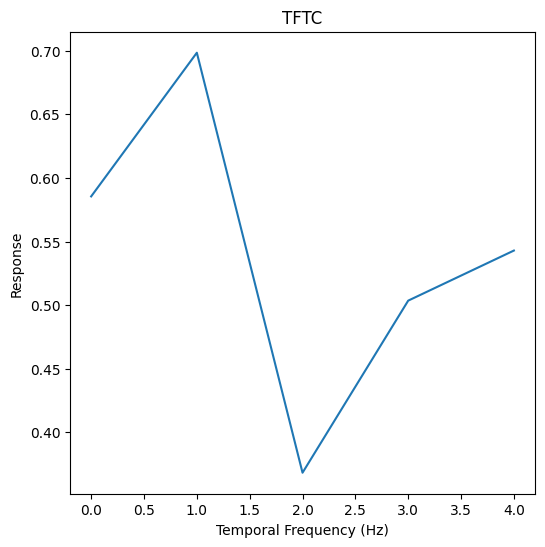

In [22]:
# Plot the sinogram for a single unit
plt.figure(figsize=(12, 6))
plt.imshow(sinogram[0, :, :], cmap='hot', interpolation='nearest', aspect='auto')  # Plot the sinogram for unit 0
plt.xlabel('Time (ms)')
plt.ylabel('Orientation (deg)')
plt.title('Sinogram')
plt.xticks(np.arange(0, num_time_bins, 5), np.arange(0, num_time_bins*10, 50))  # Label x-axis with time values
plt.yticks(np.arange(0, num_orientations, 1), np.arange(0, 360, 45))  # Label y-axis with orientation values
plt.show()

# Calculate OSI for each unit
osi = np.zeros(num_units)  # Create an array to store OSI values
for i in range(num_units):
    osi[i] = np.max(sinogram[i, :, :]) / np.sum(sinogram[i, :, :])  # Calculate OSI for each unit
    
# Plot OSI distribution
plt.figure(figsize=(6, 6))
plt.hist(osi, bins=50)  # Plot the distribution of OSI values
plt.xlabel('OSI')
plt.ylabel('Frequency')
plt.title('OSI Distribution')
plt.show()

# Calculate temporal frequency tuning curve for each unit
tftc = np.zeros((num_units, num_temporal_frequencies))  # Create an array to store TFTC values
for i in range(num_units):
    for j in range(num_temporal_frequencies):
        tftc[i, j] = np.mean(sinogram[i, :, j])  # Calculate TFTC for each unit

# Plot TFTC for a single unit
plt.figure(figsize=(6, 6))
plt.plot(tftc[0, :])  # Plot the TFTC for unit 0
plt.xlabel('Temporal Frequency (Hz)')
plt.ylabel('Response')
plt.title('TFTC')
plt.show()

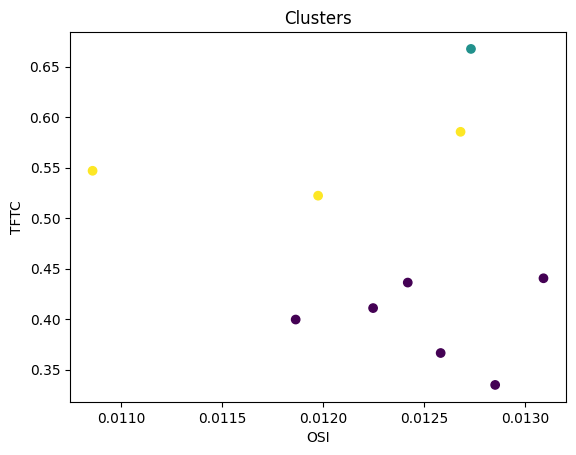

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate OSI and TFTC for each unit
osi = np.zeros(num_units)
tftc = np.zeros((num_units, num_temporal_frequencies))
for i in range(num_units):
    osi[i] = np.max(sinogram[i, :, :]) / np.sum(sinogram[i, :, :])
    for j in range(num_temporal_frequencies):
        tftc[i, j] = np.mean(sinogram[i, :, j])

# Perform k-means clustering on OSI and TFTC values
kmeans = KMeans(n_clusters=3)
kmeans.fit(np.column_stack((osi, tftc[:, 0])))  # Use the first column of tftc for clustering

# Plot the clusters
plt.scatter(osi, tftc[:, 0], c=kmeans.labels_)
plt.xlabel('OSI')
plt.ylabel('TFTC')
plt.title('Clusters')
plt.show()